In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /mydrive
%cd /mydrive/Pytorch-Models

Mounted at /content/gdrive
/content/gdrive/.shortcut-targets-by-id/1aJsbt04Jz9xcLP_lg7fvP4Bpdce6GQlC/Pytorch-Models


In [ ]:
# 1. Clone and install SuperGradients manually (latest from GitHub)
!git clone https://github.com/Deci-AI/super-gradients.git
%cd super-gradients

# CLEAN installation — no Sphinx, no doc tools
!pip install -e . --no-deps
!pip install hydra-core==1.3.2 torchmetrics==0.8.0 Deprecated==1.2.13 pyDeprecate==0.3.2

In [ ]:
!pip install boto3
!pip install data-gradients~=0.3.1
!pip install json-tricks==3.16.1
!pip install rapidfuzz
!pip install stringcase>=1.2.0
!pip install treelib==1.6.1
!pip install albumentations~=1.3
!pip install einops==0.3.2
!pip install termcolor==1.1.0

In [ ]:
!pip install setuptools==66.0.0

In [6]:
!python --version

Python 3.12.11


In [ ]:
# --- Step 1: Install Python 3.11 in Colab ---
!sudo apt-get update -y
!sudo apt-get install -y python3.11 python3.11-distutils python3.11-venv

# --- Step 2: Make sure pip for 3.11 exists ---
!curl -sS https://bootstrap.pypa.io/get-pip.py | python3.11

# --- Step 3: Upgrade pip + wheel + setuptools (important for old packages) ---
!python3.11 -m pip install --upgrade pip setuptools wheel

# --- Step 4: Install your packages using Python 3.11 explicitly ---
!python3.11 -m pip install data-gradients==0.3.1 json-tricks==3.16.1 \
    "onnxruntime>=1.15.0" "onnxsim<1.0,>=0.4.3" \
    "pip-tools>=6.12.1" rapidfuzz stringcase==1.2.0 treelib==1.6.1

In [ ]:
# Install super-gradients & dependencies
!python3.11 -m pip install super-gradients

In [9]:
!pip install data-gradients==0.3.1 json-tricks==3.16.1 onnxruntime>=1.15.0 "onnxsim<1.0,>=0.4.3" pip-tools>=6.12.1 rapidfuzz stringcase==1.2.0 treelib==1.6.1

In [10]:
!pip show super-gradients

Name: super-gradients
Version: 3.7.1+master
Summary: SuperGradients
Home-page: https://docs.deci.ai/super-gradients/documentation/source/welcome.html
Author: Deci AI
Author-email: rnd@deci.ai
License: 
Location: /usr/local/lib/python3.11/dist-packages
Editable project location: /content/gdrive/.shortcut-targets-by-id/1aJsbt04Jz9xcLP_lg7fvP4Bpdce6GQlC/Pytorch-Models/super-gradients
Requires: albumentations, boto3, data-gradients, Deprecated, einops, fonttools, hydra-core, imagesize, json-tricks, jsonschema, matplotlib, onnx, onnxruntime, onnxsim, packaging, pillow, pip-tools, psutil, pygments, rapidfuzz, scipy, setuptools, stringcase, tensorboard, termcolor, torch, torchmetrics, torchvision, tqdm, treelib, werkzeug, wheel
Required-by: 


In [ ]:
%cd super-gradients

/content/gdrive/.shortcut-targets-by-id/1aJsbt04Jz9xcLP_lg7fvP4Bpdce6GQlC/Pytorch-Models/super-gradients


In [11]:
import sys
sys.path.append('/content/gdrive/.shortcut-targets-by-id/1aJsbt04Jz9xcLP_lg7fvP4Bpdce6GQlC/Pytorch-Models/super-gradients/src')

In [12]:
import os
os.environ["NO_ALBUMENTATIONS_UPDATE"] = "1"

In [2]:
print("hello")

hello


In [14]:
import subprocess
import sys
from threading import Thread
from queue import Queue, Empty

class Py311Notebook:
    def __init__(self):
        # Start Python 3.11 in interactive mode
        self.proc = subprocess.Popen(
            ["python3.11", "-i"],
            stdin=subprocess.PIPE,
            stdout=subprocess.PIPE,
            stderr=subprocess.PIPE,
            text=True,
            bufsize=1
        )
        # Queues to read stdout/stderr asynchronously
        self.stdout_queue = Queue()
        self.stderr_queue = Queue()
        Thread(target=self._enqueue_output, args=(self.proc.stdout, self.stdout_queue), daemon=True).start()
        Thread(target=self._enqueue_output, args=(self.proc.stderr, self.stderr_queue), daemon=True).start()
        self.marker = "###END_OF_CELL###"

    def _enqueue_output(self, stream, queue):
        for line in iter(stream.readline, ''):
            queue.put(line)

    def run_cell(self, code: str, timeout=5):
        """
        Run Python 3.11 code as a notebook cell
        """
        # Append print marker
        code_to_run = f"{code}\nprint('{self.marker}')\n"
        self.proc.stdin.write(code_to_run)
        self.proc.stdin.flush()

        # Capture stdout until marker
        stdout_lines = []
        while True:
            try:
                line = self.stdout_queue.get(timeout=timeout)
                if self.marker in line:
                    break
                stdout_lines.append(line)
            except Empty:
                break
        stdout = "".join(stdout_lines)

        # Capture stderr
        stderr_lines = []
        while True:
            try:
                line = self.stderr_queue.get_nowait()
                stderr_lines.append(line)
            except Empty:
                break
        stderr = "".join(stderr_lines)

        # Display outputs in notebook
        if stdout:
            print(stdout, end='')
        if stderr:
            print(stderr, end='', file=sys.stderr)

        return {"stdout": stdout, "stderr": stderr}

    def close(self):
        self.proc.stdin.write("exit()\n")
        self.proc.stdin.flush()
        self.proc.terminate()

In [15]:
# Start persistent Python 3.11
py311 = Py311Notebook()

# First cell: imports
py311.run_cell("""
import os
os.environ["MPLBACKEND"] = "agg"
from super_gradients.training import Trainer, models
from super_gradients.training.datasets.pose_estimation_datasets.coco_keypoints import COCOKeypointsDataset
from super_gradients.training.dataloaders.dataloaders import get_data_loader
from super_gradients.training.utils.distributed_training_utils import setup_device
print("Imported successfully!")
""")

Python 3.11.13 (main, Jun  4 2025, 08:57:29) [GCC 11.4.0] on linux
Type "help", "copyright", "credits" or "license" for more information.


{'stdout': '',
 'stderr': 'Python 3.11.13 (main, Jun  4 2025, 08:57:29) [GCC 11.4.0] on linux\nType "help", "copyright", "credits" or "license" for more information.\n'}

In [17]:
# Second cell: create objects
py311.run_cell("""
model = models.get("YOLO_NAS_POSE_L", num_classes=17, checkpoint_path="/content/gdrive/MyDrive/Pytorch-Models/super-gradients/checkpoints/human_pose/yolo_nas_pose_l_coco_pose.pth")
print("2nd cell")
""")

{'stdout': '', 'stderr': ''}

In [19]:
# Third cell: use objects
py311.run_cell("""
model.eval()
model.prep_model_for_conversion(input_size=[1, 3, 640, 640])
print("3rd cell")
""")

{'stdout': '', 'stderr': ''}

In [ ]:
py311.run_cell("""
import torch

# Define a dummy input tensor with the expected shape (batch_size, channels, height, width)
# Assuming the model expects a batch size of 1, 3 channels (RGB), and a spatial size of 512x512
dummy_input = torch.randn(1, 3, 640, 640).cuda()

# Move the model to the GPU
model.cuda()

torch.onnx.export(model, dummy_input,  "YOLO_NAS_POSE_L.onnx")
""")

In [ ]:
py311.run_cell("""

""")

In [ ]:
py311.run_cell("""

""")

In [ ]:
# When done
py311.close()

In [ ]:
!pip uninstall onnxruntime -y
!pip install onnxruntime-gpu

In [4]:
import onnxruntime
import numpy as np
import cv2
import torch

# Load image and preprocess (assume 640x640)
img_path = "/content/gdrive/MyDrive/Pytorch-Models/datasets/pose-tests/pose (12).jpg"

img = cv2.imread(img_path)
img_resized = cv2.resize(img, (640, 640))
img_input = img_resized.astype(np.float32) / 255.0
img_input = img_input.transpose(2, 0, 1)[np.newaxis, :]  # (1, 3, H, W)

# Run inference
session = onnxruntime.InferenceSession("super-gradients/YOLO_NAS_POSE_L.onnx", providers=["CUDAExecutionProvider"]) # super-gradients/
input_name = session.get_inputs()[0].name
outputs = session.run(None, {input_name: img_input})

# outputs is a list, often like [boxes, scores, keypoints]
print("Output:", [o.shape for o in outputs])

Output: [(1, 8400, 4), (1, 8400, 1), (1, 8400, 17, 2), (1, 8400, 17)]


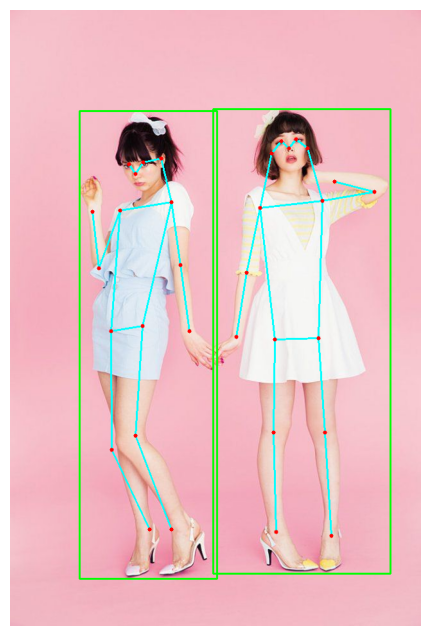

In [5]:
import torch
from torchvision.ops import nms
import cv2

# Unpack outputs
boxes, scores, keypoints, kp_scores = outputs
boxes = boxes[0]           # (5376, 4)
scores = scores[0].squeeze(-1)  # (5376,)
keypoints = keypoints[0]   # (5376, 6, 2)
kp_scores = kp_scores[0]   # (5376, 6)

# Apply NMS
boxes_tensor = torch.tensor(boxes, dtype=torch.float32)
scores_tensor = torch.tensor(scores, dtype=torch.float32)
nms_indices = nms(boxes_tensor, scores_tensor, iou_threshold=0.5)

# Filter everything
boxes = boxes_tensor[nms_indices].numpy()
scores = scores_tensor[nms_indices].numpy()
keypoints = keypoints[nms_indices]
kp_scores = kp_scores[nms_indices]

# Resize back to original scale
h_orig, w_orig = img.shape[:2]
scale_x = w_orig / 640
scale_y = h_orig / 640

conf_thr = 0.2

# Define pairs of keypoints to connect (example for COCO person 17 points)
pairs = [
    [0, 1], [0, 2],       # Nose to eyes
    [1, 3], [2, 4],       # Eyes to ears
    [3, 5], [4, 6],       # ears to shoulders
    [5, 6],               # Shoulders
    [5, 7], [7, 9],       # Left Arm
    [6, 8], [8, 10],      # Right Arm
    [5, 11], [6, 12],     # Torso
    [11, 12],             # Hip
    [11, 13], [13, 15],   # Left Leg
    [12, 14], [14, 16],   # Right Leg
]

# Prepare storage for scaled keypoints of all detected objects
all_kpts_scaled = []

for i in range(len(scores)):
    if scores[i] < conf_thr:
        continue

    # Scale the box to original size
    x1, y1, x2, y2 = boxes[i]
    x1 = int(x1 * scale_x)
    y1 = int(y1 * scale_y)
    x2 = int(x2 * scale_x)
    y2 = int(y2 * scale_y)

    x1 = max(0, min(x1, w_orig - 1))
    y1 = max(0, min(y1, h_orig - 1))
    x2 = max(0, min(x2, w_orig - 1))
    y2 = max(0, min(y2, h_orig - 1))

    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Keypoints: scale to original size and store for link drawing
    kpts_scaled = []
    for k in range(len(keypoints[i])):
        kx, ky = keypoints[i][k]
        kp_score = kp_scores[i][k]
        if kp_score > 0.3:
            kx = int(kx * scale_x)
            ky = int(ky * scale_y)
            kpts_scaled.append((kx, ky))
        else:
            kpts_scaled.append(None)
    all_kpts_scaled.append(kpts_scaled)

# Draw links first (for all detected objects)
for kpts_scaled in all_kpts_scaled:
    for (p1, p2) in pairs:
        if kpts_scaled[p1] is not None and kpts_scaled[p2] is not None:
            cv2.line(img, kpts_scaled[p1], kpts_scaled[p2], (255, 255, 0), 2)

# Draw keypoint circles last (for all detected objects)
for kpts_scaled in all_kpts_scaled:
    for pt in kpts_scaled:
        if pt is not None:
            cv2.circle(img, pt, 3, (0, 0, 255), -1)

# Visualize
from matplotlib import pyplot as plt
plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

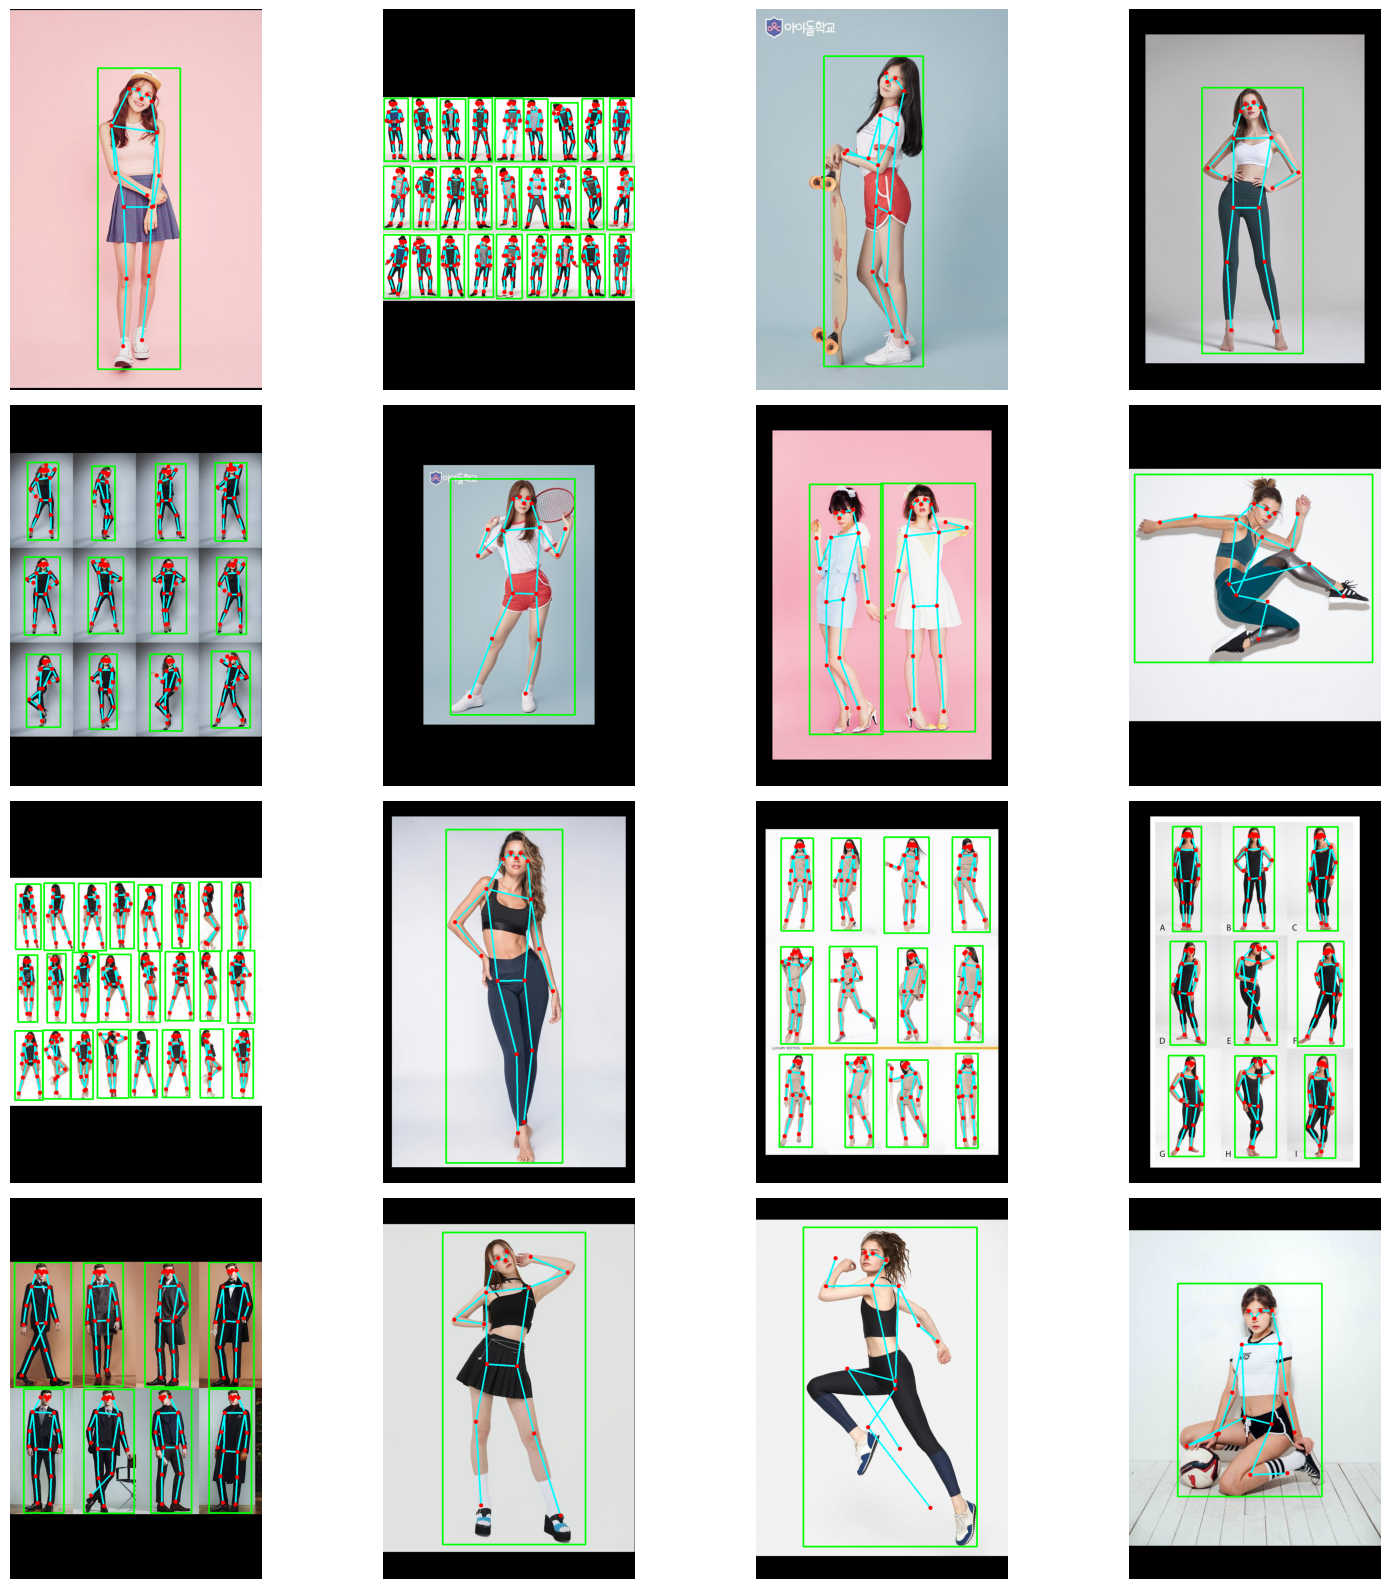

In [6]:
import os
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt
import onnxruntime
import torch
from torchvision.ops import nms

# --- Config ---
val_dir = "/content/gdrive/MyDrive/Pytorch-Models/datasets/pose-tests"
onnx_path = "super-gradients/YOLO_NAS_POSE_L.onnx"

score_thr = 0.2
num_samples = 16
skeleton = [
    [0, 1], [0, 2],       # Nose to eyes
    [1, 3], [2, 4],       # Eyes to ears
    [3, 5], [4, 6],       # ears to shoulders
    [5, 6],               # Shoulders
    [5, 7], [7, 9],       # Left Arm
    [6, 8], [8, 10],      # Right Arm
    [5, 11], [6, 12],     # Torso
    [11, 12],             # Hip
    [11, 13], [13, 15],   # Left Leg
    [12, 14], [14, 16],   # Right Leg
]

# --- Load Images ---
all_imgs = [f for f in os.listdir(val_dir) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]
selected_imgs = random.sample(all_imgs, min(num_samples, len(all_imgs)))

img_list = []
img_sizes = []

for img_name in selected_imgs:
    img_path = os.path.join(val_dir, img_name)
    img_cv = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB)
    img_list.append((img_name, img_path, img_rgb))
    img_sizes.append(img_rgb.shape[:2])

max_height = max(h for h, w in img_sizes)
max_width = max(w for h, w in img_sizes)

# --- ONNX Runtime Setup ---
session = onnxruntime.InferenceSession(onnx_path, providers=["CUDAExecutionProvider"])
input_name = session.get_inputs()[0].name

# --- Plotting ---
cols = 4
rows = (len(img_list) + cols - 1) // cols
plt.figure(figsize=(4 * cols, 4 * rows))

for idx, (img_name, img_path, img_rgb) in enumerate(img_list):
    img = cv2.imread(img_path)
    h_orig, w_orig = img.shape[:2]

    # Preprocess
    img_resized = cv2.resize(img, (640, 640))
    img_input = img_resized.astype(np.float32) / 255.0
    img_input = img_input.transpose(2, 0, 1)[np.newaxis, :]  # (1, 3, H, W)

    # Inference
    outputs = session.run(None, {input_name: img_input})
    boxes, scores, keypoints, kp_scores = outputs
    boxes = boxes[0]
    scores = scores[0].squeeze(-1)
    keypoints = keypoints[0]
    kp_scores = kp_scores[0]

    # Apply NMS
    boxes_tensor = torch.tensor(boxes, dtype=torch.float32)
    scores_tensor = torch.tensor(scores, dtype=torch.float32)
    keep = nms(boxes_tensor, scores_tensor, iou_threshold=0.3)

    boxes = boxes_tensor[keep].numpy()
    scores = scores_tensor[keep].numpy()
    keypoints = keypoints[keep]
    kp_scores = kp_scores[keep]

    scale_x = w_orig / 640
    scale_y = h_orig / 640

    img_vis = cv2.cvtColor(img.copy(), cv2.COLOR_BGR2RGB)

    all_kpts_scaled = []

    for i in range(len(scores)):
        if scores[i] < score_thr:
            continue

        # Scale the box to original size
        x1, y1, x2, y2 = boxes[i]
        x1 = int(x1 * scale_x)
        y1 = int(y1 * scale_y)
        x2 = int(x2 * scale_x)
        y2 = int(y2 * scale_y)

        x1 = max(0, min(x1, w_orig - 1))
        y1 = max(0, min(y1, h_orig - 1))
        x2 = max(0, min(x2, w_orig - 1))
        y2 = max(0, min(y2, h_orig - 1))
        cv2.rectangle(img_vis, (x1, y1), (x2, y2), (0, 255, 0), 3)

        # Keypoints: scale to original size and store for link drawing
        kpts_scaled = []
        for k in range(len(keypoints[i])):
            kx, ky = keypoints[i][k]
            kp_score = kp_scores[i][k]
            if kp_score > 0.5:
                kx = int(kx * scale_x)
                ky = int(ky * scale_y)
                kpts_scaled.append((kx, ky))
            else:
                kpts_scaled.append(None)
        all_kpts_scaled.append(kpts_scaled)

    # Draw links first (for all detected objects)
    for kpts_scaled in all_kpts_scaled:
        for (p1, p2) in skeleton:
            if kpts_scaled[p1] is not None and kpts_scaled[p2] is not None:
                cv2.line(img_vis, kpts_scaled[p1], kpts_scaled[p2], (0, 255, 255), 4)

    # Draw keypoint circles last (for all detected objects)
    for kpts_scaled in all_kpts_scaled:
        for pt in kpts_scaled:
            if pt is not None:
                cv2.circle(img_vis, pt, 6, (255, 0, 0), -1)

    # Padding
    h, w = img_vis.shape[:2]
    top = (max_height - h) // 2
    bottom = max_height - h - top
    left = (max_width - w) // 2
    right = max_width - w - left
    img_padded = cv2.copyMakeBorder(img_vis, top, bottom, left, right,
                                    borderType=cv2.BORDER_CONSTANT, value=(0, 0, 0))

    plt.subplot(rows, cols, idx + 1)
    plt.imshow(img_padded)
    plt.axis('off')

plt.tight_layout()
plt.show()